In [1]:
import pandas as pd
import re 
from Levenshtein import distance as lev
import urllib.parse

In [29]:
df = pd.read_csv('word_lists/acter/nl_en.csv', delimiter='\t', header=None)

In [30]:
df=pd.DataFrame(df.values, columns = ["source", "target"])

In [31]:
df['target'] = df['target'].apply(lambda x : x.replace('_',' '))

In [32]:
df['source'] = df['source'].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x))
df['target'] = df['target'].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x))

In [33]:
df['source_words'] = df['source'].str.split().str.len()
df['target_words'] = df['target'].str.split().str.len()

In [34]:
def title_parse(title):
    title = urllib.parse.unquote(title)
    return title
df['source']= df.source.apply(title_parse)
df['target']= df.target.apply(title_parse)

In [35]:
df

,source,target,source_words,target_words
0,6-minutenlooptest,"6-mwt, 6-minute walking distance, 6-min walk t...",1,24
1,a. carotis,"coronary artery, coronary arteries, coronary",2,5
2,aandoening,"condition, conditions, disease, diseases",1,4
3,aandoeningen,"condition, conditions, disease, diseases",1,4
4,aangeboren,congenital,1,1
...,...,...,...,...
979,ß1-receptor,"beta1-adrenergic receptor, β1-adrenergic recep...",1,6
980,ß2-receptoren,β2-receptor,1,1
981,β-blokker,"bb, beta blockers, beta receptor blockers, bet...",1,13
982,β-blokkers,"bb, beta blockers, beta receptor blockers, bet...",1,13


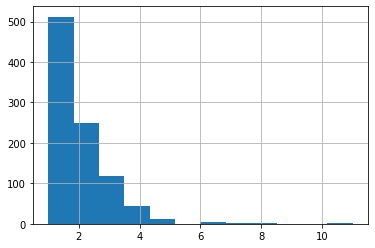

In [16]:
hist = df['source_words'].hist(bins=12)

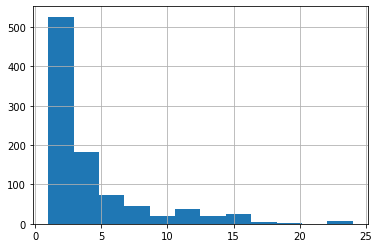

In [17]:
hist = df['target_words'].hist(bins=12)

In [18]:
df['compare'] = df.apply(lambda x : 1 if x['source_words'] == x['target_words'] else 2, axis=1)


In [19]:
df['distance'] = df.apply(lambda x : lev(str(x['source']),str(x['target'])), axis=1)
df['distance'] = df['distance'].apply(lambda x : 20 if x>20 else x)

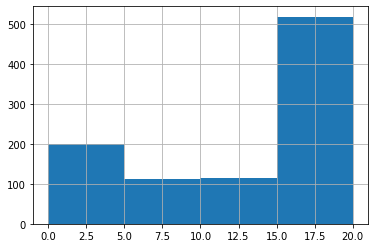

In [20]:
hist = df['distance'].hist(bins=4)

In [38]:
lev(str(df['source_words'][0]),str(df['target_words'][0]))

1

In [39]:
df

,source,wiki_sanity_source,target,wiki_sanity_target,source_words,target_words,compare,distance
0,Heart failure,90791,Hartfalen,0,2,1,2,1
1,Pulmonary hypertension,58451,Pulmonale hypertensie,0,2,2,1,0
2,Asystole,20941,Asystolie,0,1,1,1,0
3,Frank–Starling law,22336,Frank-Starlingmechanisme,0,2,1,2,1
4,Paget's disease of bone,39804,Botziekte van Paget,0,4,3,2,1
...,...,...,...,...,...,...,...,...
5747,Pulmonary edema,29579,Longoedeem,0,2,1,2,1
5748,Biomolecule,32536,Biomolecuul,0,1,1,1,0
5749,Lycoris,20822,Lycoris,0,1,1,1,0
5750,Liquor,41986,Gedistilleerde drank,0,1,2,2,1


In [25]:
identical_df = df.loc[df['source_words'] == 1]
identical_df = df.loc[df['target_words'] == 1]

In [26]:
identical_df.to_csv('acter_singleword_en_nl.csv')

In [28]:
len(set(identical_df['target']))

215

In [36]:
word_list = []
for x in df[1:].iterrows():
    print(x[1])
    if x[1]['source_words'] == 1 and x[1]['target_words'] == 1:
        word_list.append('{}\t{}'.format(x[1]['source'].lower(),x[1]['target'].lower()))

source                                            a. carotis
target          coronary artery, coronary arteries, coronary
source_words                                               2
target_words                                               5
Name: 1, dtype: object
source                                        aandoening
target          condition, conditions, disease, diseases
source_words                                           1
target_words                                           4
Name: 2, dtype: object
source                                      aandoeningen
target          condition, conditions, disease, diseases
source_words                                           1
target_words                                           4
Name: 3, dtype: object
source          aangeboren
target          congenital
source_words             1
target_words             1
Name: 4, dtype: object
source          abdominale
target           abdominal
source_words             1
target_words       

Name: 375, dtype: object
source          europa
target          europe
source_words         1
target_words         1
Name: 376, dtype: object
source               european society of cardiology
target          european society of cardiology, esc
source_words                                      4
target_words                                      5
Name: 377, dtype: object
source          europese sociëteit voor cardiologie
target          european society of cardiology, esc
source_words                                      4
target_words                                      5
Name: 378, dtype: object
source             euthanasie
target          euthanization
source_words                1
target_words                1
Name: 379, dtype: object
source          evidence-based
target          evidence-based
source_words                 1
target_words                 1
Name: 380, dtype: object
source           evidencebased
target          evidence-based
source_words                 1
targe

Name: 693, dtype: object
source                                             nyha klasse ii
target          new york heart association class ii, nyha func...
source_words                                                    3
target_words                                                   11
Name: 694, dtype: object
source          nyha
target          nyha
source_words       1
target_words       1
Name: 695, dtype: object
source                                              nyha-klasse 3
target          new york heart association class iii, nyha cla...
source_words                                                    2
target_words                                                   14
Name: 696, dtype: object
source                                             nyha-klasse ii
target          new york heart association class ii, nyha func...
source_words                                                    2
target_words                                                   11
Name: 697, dtype: object

In [37]:
import random
random.shuffle(word_list)

In [40]:
with open('acter_singleword_en_nl.txt', 'w') as the_file:
    for line in word_list:
        the_file.write('{}\n'.format(line))

In [39]:
len(word_list)

253

In [41]:
word_list

['hypotensie\thypotension',
 'echocardiografische\techocardiographic',
 'ontsteking\tinflammation',
 'echocardiografisch\techocardiographic',
 'artritis\tarthritis',
 'cachexie\tcachexia',
 'asymptomatische\tasymptomatic',
 'aldosteron\taldosterone',
 'spironolacton\tspironolactone',
 'obesitas\tobesity',
 'terminale\tterminal',
 'incidentie\tincidence',
 'atrioventriculaire\tatrioventricular',
 'natrium\tsodium',
 'placebo\tplacebo',
 'bloedingen\tbleeding',
 'europa\teurope',
 'furosemide\tfurosemide',
 'auscultatie\tauscultation',
 'idiopathische\tidiopathic',
 'renale\trenal',
 'hypoxie\thypoxia',
 'hypertensie\thypertension',
 'r\tr',
 'parasympathische\tparasympathetic',
 'natriuretische\tnatriuretic',
 'longen\tlung',
 'baseline\tbaseline',
 'chemotherapie\tchemotherapy',
 'diuretische\tdiuretic',
 'k\tpotassium',
 'diagnostisch\tdiagnostic',
 'snp\tsnp',
 'thorax\tchest',
 'osteoporose\tosteoporosis',
 'at1\tat1',
 'stabiel\tstable',
 'creatinine\tcreatinine',
 'pulmonaal\tpulm